In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer, LancasterStemmer
import re
import nltk

In [2]:
df_bnb = pd.read_csv('data_bnb.csv')

## Binance

In [3]:
df_bnb.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482842032897138690,b'RT @MetakingsAI: \xf0\x9f\x8f\x86\xf0\x9f\x8...,2022-01-16 22:27:45,NaN
1,1,1482842029675581440,b'RT @missufe: $150 | 2.100.000 IDR IN 12 HRS ...,2022-01-16 22:27:44,NaN
2,2,1482842029134602252,b'@BabyDogeCoin @cz_binance #BabyDoge',2022-01-16 22:27:44,NaN
3,3,1482842029067587585,b'@ingenious_geek @decentraland @bloktopia @Th...,2022-01-16 22:27:44,NaN
4,4,1482842026982973443,b'RT @cryptot81124402: Which #crypto should @b...,2022-01-16 22:27:43,NaN


In [4]:
mask = df_bnb.duplicated(subset=['text'])
df_bnb[mask]

,Unnamed: 0,id,text,datetime,Location
9,9,1482842013834047491,b'RT @missufe: $150 | 2.100.000 IDR IN 12 HRS ...,2022-01-16 22:27:40,NaN
26,26,1482841966140624896,b'RT @defiswap_app: DeFiSwap is an open and co...,2022-01-16 22:27:29,NaN
29,29,1482841958993248261,b'RT @MetakingsAI: \xf0\x9f\x8f\x86\xf0\x9f\x8...,2022-01-16 22:27:27,NaN
31,31,1482841957273829376,b'RT @CheemsInu: As we get closer to the relea...,2022-01-16 22:27:27,NaN
39,39,1482841934402142208,b'RT @Fatoshibsc: Listen to the words of @wolf...,2022-01-16 22:27:21,NaN
...,...,...,...,...,...
1977,1977,1482838571341996034,b'RT @deficonnect: Soon to come...\n\nDELTA7 o...,2022-01-16 22:13:59,NaN
1987,1987,1482838555160371202,b'RT @Egyptiangodsnft: Welcome Egyptian Gods N...,2022-01-16 22:13:56,NaN
1989,1989,1482838549728743430,b'RT @binance: F https://t.co/ywkiAr9jfT',2022-01-16 22:13:54,NaN
1991,1991,1482838546725720066,b'RT @binance: F https://t.co/ywkiAr9jfT',2022-01-16 22:13:54,NaN


In [5]:
df_bnb = df_bnb[~mask].reset_index(drop=True)
df_bnb.shape

(1242, 5)

In [6]:
df_bnb.head()

,Unnamed: 0,id,text,datetime,Location
0,0,1482842032897138690,b'RT @MetakingsAI: \xf0\x9f\x8f\x86\xf0\x9f\x8...,2022-01-16 22:27:45,NaN
1,1,1482842029675581440,b'RT @missufe: $150 | 2.100.000 IDR IN 12 HRS ...,2022-01-16 22:27:44,NaN
2,2,1482842029134602252,b'@BabyDogeCoin @cz_binance #BabyDoge',2022-01-16 22:27:44,NaN
3,3,1482842029067587585,b'@ingenious_geek @decentraland @bloktopia @Th...,2022-01-16 22:27:44,NaN
4,4,1482842026982973443,b'RT @cryptot81124402: Which #crypto should @b...,2022-01-16 22:27:43,NaN


In [7]:
df_bnb_orig = df_bnb.copy()

In [8]:
for tweet in df_bnb['text'].sample(5).values:
    print(tweet)

b'@FEGtoken @binance \xe2\x99\xa5\xef\xb8\x8f\xe2\x9d\x8e\xe2\x99\xa5\xef\xb8\x8f $FEG will rise from the ashes like a Phoenix\xf0\x9f\x94\xa5\n\xf0\x9f\xa6\x8d\n$USCT $FEG #SmartDefi $FEG #ListOnFEGex\xe2\x80\xa6 https://t.co/qB8cLjMJni'
b'RT @taftoken: @TheresaTaljaard @LandM_Marius @MariusBTAF @KOKLOLEG1 @Crypto_Kimmy @cz_binance $TAF will be listing on @dxsale and @PancakeS\xe2\x80\xa6'
b'@cz_binance I have created a website where you can use binance coin and all bep20 tokens to purchase over 100,000 p\xe2\x80\xa6 https://t.co/8Yg3FVZoi4'
b'RT @shehkie3: @CaroWarOfficial Great project \xf0\x9f\x91\x8d\xf0\x9f\x91\x8d\xf0\x9f\x91\x8d\n\nJoin @majied68 @elonmusk @azarijahromi @cz_binance @SamuelLJackson @najiem72\n\n#BSC #CRW #\xe2\x80\xa6'
b'RT @Lasiv4: @binance BABYDOGECO\xc4\xb0N \xf0\x9f\x92\xa3 https://t.co/LKAfZL1MBg'


### Put all hashtags into a new column

In [9]:
df_bnb['hashtag'] = df_bnb['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_bnb.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482842032897138690,b'RT @MetakingsAI: \xf0\x9f\x8f\x86\xf0\x9f\x8...,2022-01-16 22:27:45,NaN,[]
1,1,1482842029675581440,b'RT @missufe: $150 | 2.100.000 IDR IN 12 HRS ...,2022-01-16 22:27:44,NaN,[Byakko]
2,2,1482842029134602252,b'@BabyDogeCoin @cz_binance #BabyDoge',2022-01-16 22:27:44,NaN,[BabyDoge]
3,3,1482842029067587585,b'@ingenious_geek @decentraland @bloktopia @Th...,2022-01-16 22:27:44,NaN,[Bloktopia]
4,4,1482842026982973443,b'RT @cryptot81124402: Which #crypto should @b...,2022-01-16 22:27:43,NaN,[crypto]


### Remove emojis

In [10]:
df_bnb.text = df_bnb.text.apply(lambda x: ' '.join([a for a in x.split() if '\\' not in a]))

In [11]:
test = df_bnb.text
print(test)

0       b'RT @MetakingsAI: OFFICIAL AIRDROP AND DISTRI...
1       b'RT @missufe: $150 | 2.100.000 IDR IN 12 HRS ...
2                  b'@BabyDogeCoin @cz_binance #BabyDoge'
3       b'@ingenious_geek @decentraland @bloktopia @Th...
4       b'RT @cryptot81124402: Which #crypto should @b...
                              ...                        
1237    b"@cryptolaney #Revival and #Vival so I can st...
1238    b'@FEGtoken @binance $FEG $FEG $FEG $FEG $FEG ...
1239    b'RT @FlokiMooni: #Flokimooni is going viral 3...
1240    b'@AltcoinWorldcom @BabyDogeCoin @BabyDogeCoin...
1241    b'@FEGtoken @binance $FEG $FEG $FEG $FEG $FEG ...
Name: text, Length: 1242, dtype: object


In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_special_characters(text):
    text = re.sub("@\S+", "", text) #remove mentions
    text = re.sub("https?:\/\/.*[\r\n]*", "", text) #remove hyperlinks
    text = re.sub("#", "", text) #remove hashtag symbol
    text = re.sub('\w*\d\w*', ' ', text) #remove numbers
    text = re.sub("b'RT",'', text) #remove b'RT
    text = re.sub("b'",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    return text

In [14]:
df_bnb.text = df_bnb.text.apply(remove_special_characters)

In [15]:
df_bnb.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482842032897138690,OFFICIAL AIRDROP AND DISTRIBUTION HAS BEEN ...,2022-01-16 22:27:45,NaN,[]
1,1,1482842029675581440,IDR IN HRS quote retweet pin po...,2022-01-16 22:27:44,NaN,[Byakko]
2,2,1482842029134602252,BabyDoge,2022-01-16 22:27:44,NaN,[BabyDoge]
3,3,1482842029067587585,Honestly starting to wonder if Bloktopia is,2022-01-16 22:27:44,NaN,[Bloktopia]
4,4,1482842026982973443,Which crypto should list next sha mtv ...,2022-01-16 22:27:43,NaN,[crypto]


### Remove digits and lower the text

In [16]:
df_bnb.text = df_bnb.text.astype(str).str.replace('\d+', '')
df_bnb.text = df_bnb.text.str.lower()
df_bnb.text.head()

/var/folders/bc/c9cbz3vx3k331bfmmjlgtbkm0000gn/T/ipykernel_36727/1220783607.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_bnb.text = df_bnb.text.astype(str).str.replace('\d+', '')


0      official airdrop and distribution has been  ...
1                 idr in   hrs quote retweet pin po...
2                                            babydoge 
3         honestly starting to wonder if bloktopia is 
4      which crypto should  list next   sha   mtv  ...
Name: text, dtype: object

### Stemming text

In [17]:
from nltk.tokenize import TweetTokenizer

In [18]:
wnl = WordNetLemmatizer()
stemmer = LancasterStemmer()
def lemmatize_text(text):
    text = text.split(' ')
    for i, word in enumerate(text):
        text[i] = wnl.lemmatize(word)   #results for stemming is better lemmatization
        #text[i] = stemmer.stem(word)    
    return ' '.join(text)

In [19]:
df_bnb.text = df_bnb.text.apply(lemmatize_text)
df_bnb.head()

,Unnamed: 0,id,text,datetime,Location,hashtag
0,0,1482842032897138690,official airdrop and distribution ha been ...,2022-01-16 22:27:45,NaN,[]
1,1,1482842029675581440,idr in hr quote retweet pin pos...,2022-01-16 22:27:44,NaN,[Byakko]
2,2,1482842029134602252,babydoge,2022-01-16 22:27:44,NaN,[BabyDoge]
3,3,1482842029067587585,honestly starting to wonder if bloktopia is,2022-01-16 22:27:44,NaN,[Bloktopia]
4,4,1482842026982973443,which crypto should list next sha mtv ...,2022-01-16 22:27:43,NaN,[crypto]


### Check if there is non-enlighs words and remove them

In [20]:
test = df_bnb.text
test

0         official airdrop and distribution ha been   ...
1                    idr in   hr quote retweet pin pos...
2                                               babydoge 
3            honestly starting to wonder if bloktopia is 
4         which crypto should  list next   sha   mtv  ...
                              ...                        
1237    b  revival and vival so i can stake more in re...
1238       feg  feg  feg  feg  feg smartdefi listonfeg...
1239      flokimooni is going viral   month   strong  ...
1240                                                     
1241       feg  feg  feg  feg  feg smartdefi listonfeg...
Name: text, Length: 1242, dtype: object

In [21]:
import nltk
words = set(nltk.corpus.words.words())
keep_words = ['bitcoin', 'bnbereum', 'binance','tbnber','solana','nft']

def keep_eng(text):
    return (" ".join(w for w in nltk.wordpunct_tokenize(text) if w in words or not w.isalpha() or w in keep_words))

In [22]:
df_bnb.text = df_bnb.text.apply(keep_eng)
print(df_bnb.text)

0       official airdrop and distribution ha been reward
1                              in quote pin post of with
2                                                       
3                      honestly starting to wonder if is
4                        which should list next sha toko
                              ...                       
1237              b revival and so i can stake more in s
1238                                                    
1239          is going viral month strong follower on is
1240                                                    
1241                                                    
Name: text, Length: 1242, dtype: object


### Remove rows containing empty tweets

In [23]:
print(f" There are {np.sum(df_bnb.text == '')} rows that now have empty tweets.")

 There are 438 rows that now have empty tweets.


In [24]:
mask = df_bnb.text == ''
df_bnb[mask]

,Unnamed: 0,id,text,datetime,Location,hashtag
2,2,1482842029134602252,,2022-01-16 22:27:44,NaN,[BabyDoge]
10,11,1482842012248260609,,2022-01-16 22:27:40,NaN,"[RBXS, RBXS, BSC]"
11,12,1482842010591670278,,2022-01-16 22:27:39,NaN,[FEGTOKEN]
12,13,1482842010394542083,,2022-01-16 22:27:39,NaN,"[SmartDefi, ListOnFEGex, SmartLend, FEG]"
15,16,1482841994561208321,,2022-01-16 22:27:36,NaN,[NarakaBNB]
...,...,...,...,...,...,...
1230,1984,1482838558922715140,,2022-01-16 22:13:56,NaN,"[SmartDefi, ListOnFEGex, SmartLend, AutoDeployer]"
1232,1986,1482838556435382272,,2022-01-16 22:13:56,NaN,[]
1238,1995,1482838543340916749,,2022-01-16 22:13:53,NaN,"[SmartDefi, ListOnFEGex, SmartLend, AutoDeployer]"
1240,1997,1482838540426035200,,2022-01-16 22:13:52,NaN,"[BabyDoge, BabyDogeCoin, babydogearmy, Binance]"


In [25]:
df_bnb = df_bnb[~mask]
df_bnb.shape

(804, 6)

### Tokenize the document

In [26]:
stop_words = nltk.corpus.stopwords.words('english')

In [27]:
## CountVectorize
cvec = CountVectorizer(stop_words=stop_words, max_df=7, min_df=3)
doc_word_cv = cvec.fit_transform(df_bnb.text)
pd.DataFrame(doc_word_cv.toarray(), index=df_bnb.text, columns=cvec.get_feature_names()).head(10)

,add,address,adore,al,also,always,announce,another,ape,apiece,...,way,week,winner,without,word,working,world,would,wow,zero
text,,,,,,,,,,,,,,,,,,,,,
official airdrop and distribution ha been reward,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
in quote pin post of with,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
honestly starting to wonder if is,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
which should list next sha toko,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
soon to our very own complete and almost ready for future is indeed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b binance ha the biggest fortune on the planet vaulting him into the rank of the,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
be bigger than binance bitcoin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
who want binance to accept me me,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
signal on binance future,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
##TFIDF
cv_tfidf = TfidfVectorizer(stop_words=stop_words,max_df =0.7, min_df=3)
doc_word_tfidf = cv_tfidf.fit_transform(df_bnb.text)
pd.DataFrame(doc_word_tfidf.toarray(), index=df_bnb.text, columns=cv_tfidf.get_feature_names()).head(10)

,accept,add,address,adore,airdrop,al,alert,also,always,announce,...,word,work,working,world,worth,would,wow,year,yes,zero
text,,,,,,,,,,,,,,,,,,,,,
official airdrop and distribution ha been reward,0.000000,0.0,0.0,0.0,0.55427,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
in quote pin post of with,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
honestly starting to wonder if is,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
which should list next sha toko,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
soon to our very own complete and almost ready for future is indeed,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b binance ha the biggest fortune on the planet vaulting him into the rank of the,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
be bigger than binance bitcoin,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
who want binance to accept me me,0.736831,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
signal on binance future,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
doc_word_tfidf.shape

(804, 274)

In [34]:
test = doc_word_tfidf.T

In [35]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF Model

In [36]:
from sklearn.decomposition import NMF, TruncatedSVD

In [37]:
n_topics=10
nmf = NMF(n_components=n_topics)
doc_topic=nmf.fit_transform(doc_word_tfidf)

/Users/Elena/Anaconda/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [38]:
topic_word = pd.DataFrame(nmf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_word

,accept,add,address,adore,airdrop,al,alert,also,always,announce,...,word,work,working,world,worth,would,wow,year,yes,zero
component_1,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.006,0.000,0.004,0.000,0.008,0.000,0.001,0.000,0.000
component_2,0.00,0.010,0.000,0.000,0.034,0.005,0.033,0.004,0.016,0.000,...,0.000,0.000,0.005,0.006,0.021,0.006,0.007,0.000,0.000,0.035
component_3,1.54,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.004,0.000,0.001,0.000,0.000
component_4,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.045,0.000,0.005,...,0.000,0.096,0.004,0.005,0.000,0.002,0.001,0.027,0.000,0.118
component_5,0.00,0.000,0.047,0.000,0.000,0.000,0.000,0.021,0.000,0.001,...,0.000,0.003,0.000,0.000,0.033,0.021,0.000,0.005,0.000,0.000
component_6,0.00,0.067,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.001,0.000,0.000,0.001,0.000,0.000,0.000
component_7,0.00,0.000,0.001,0.000,0.169,0.000,0.000,0.000,0.052,0.003,...,0.000,0.000,0.019,0.000,0.000,0.024,0.002,0.015,0.000,0.001
component_8,0.00,0.000,0.000,0.256,0.000,0.090,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_9,0.00,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,...,0.000,0.023,0.003,0.000,0.004,0.000,0.004,0.022,1.443,0.004
component_10,0.00,0.014,0.023,0.000,0.314,0.045,0.010,0.010,0.003,0.009,...,0.014,0.000,0.032,0.008,0.055,0.021,0.018,0.081,0.000,0.013


In [39]:
display_topics(nmf, cv_tfidf.get_feature_names(), 10)


Topic  0
ash, rise, like, take, taste, giveaway, see, right, great, love

Topic  1
binance, need, future, en, time, love, come, see, zero, smart

Topic  2
want, accept, get, new, follow, fan, month, buy, listed, need

Topic  3
token, fan, think, moon, first, listing, buy, zero, work, awesome

Topic  4
nft, market, buy, place, consider, nice, best, coin, first, need

Topic  5
list, next, holder, want, many, comment, sincerely, two, first, add

Topic  6
good, project, luck, quote, airdrop, great, see, hope, get, nice

Topic  7
de, la, adore, impatient, un, mi, con, en, son, da

Topic  8
yes, listed, get, thank, month, next, comment, breaking, getting, soon

Topic  9
go, bitcoin, day, let, today, break, airdrop, see, doge, one


In [40]:
## among all the topics, topic 9 contains a lot of unexplainanle words
## We need to inspect each topic to better under the content

In [41]:
print(doc_topic[0])

[0.         0.00322877 0.         0.00297329 0.         0.00906757
 0.02592672 0.         0.         0.12009258]


In [42]:
df_bnb.text.iloc[0]

'official airdrop and distribution ha been reward'

In [43]:
df_bnb['argmax_topic']=np.argmax(doc_topic, axis=1)
df_bnb.argmax_topic.head(10)

0     9
1     6
3     9
4     5
5     9
6     1
7     9
8     2
9     1
13    2
Name: argmax_topic, dtype: int64

In [44]:
pd.Series(df_bnb.argmax_topic).value_counts()

9    230
0    139
1    122
4     59
3     55
6     49
8     47
7     46
5     31
2     26
Name: argmax_topic, dtype: int64

In [45]:
###########
# Topic 0 #  ### FEG token (a hyper-deflationary token on both the Ethereum blockchain and the Binance Smart Chain)
###########

In [122]:
df_bnb_0=df_bnb[df_bnb.argmax_topic==0]
df_bnb_0.text.iloc[110:130]

767                                               wish me
770                                                 is on
775                                                we are
782                      only can do this in current bear
785                                                     f
799     you love our giveaway of and so another like t...
808     right or you thought to say d like prop to he ...
809                                                raffle
855                                   hello be your trust
856                                            the legend
869                                                  buna
906                   flight hotel ticket booking holiday
910            joining the bigwig like and musk should be
965                                                secret
972            the competition end on and condition apply
979     jaw drop partner to provide to the united stat...
1032      clearly the sponsorship deal is increasing with
1052          

In [112]:
df_bnb_orig.text.iloc[16]

"b'RT @CheemsInu: As we get closer to the release of MemeTools in quarter 1, I\\xe2\\x80\\x99d like to remind all of you to research how ground breaking and\\xe2\\x80\\xa6'"

In [115]:
df_bnb_orig.text.iloc[139]

"b'@FEGtoken @binance \\xe2\\x99\\xa5\\xef\\xb8\\x8f\\xe2\\x9d\\x8e\\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG will rise from the ashes like a Phoenix\\xf0\\x9f\\x94\\xa5\\n\\xf0\\x9f\\xa6\\x8d\\n$USCT $FEG #SmartDefi $FEG #ListOnFEGex\\xe2\\x80\\xa6 https://t.co/A0gxcSYwv9'"

In [120]:
df_bnb_orig.text.iloc[627]

"b'@FEGtoken @binance \\xe2\\x99\\xa5\\xef\\xb8\\x8f\\xe2\\x9d\\x8e\\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG will rise from the ashes like a Phoenix\\xf0\\x9f\\x94\\xa5\\n\\xf0\\x9f\\xa6\\x8d\\n$USCT $FEG #SmartDefi $FEG #ListOnFEGex\\xe2\\x80\\xa6 https://t.co/NXinA73ks7'"

In [121]:
df_bnb_orig.text.iloc[740]

"b'@binance Stay safe Sat \\xf0\\x9f\\xa5\\xba'"

In [51]:
df_bnb_orig.text.iloc[872]

"b'@FEGtoken @binance \\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG \\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG \\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG \\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG \\xe2\\x99\\xa5\\xef\\xb8\\x8f $FEG \\xe2\\x99\\xa5\\xef\\xb8\\x8f\\n\\xf0\\x9f\\xa6\\x8d\\n#FEG $USCT #FEG #SmartDefi #ListOnFEGex #SmartLend\\xe2\\x80\\xa6 https://t.co/1BFgGuEY8V'"

In [52]:
###########
# Topic 1 #  ### Overall, positive attitudes to Binance future
###########

In [129]:
df_bnb_1=df_bnb[df_bnb.argmax_topic==1]
df_bnb_1.text.iloc[80:100]

907          giveaway photo or video of binance the point
922     alert binance future at in the last second whi...
925                                          binance dump
934                                               binance
940                                                   rox
944           b i hold diamond like and rox don t binance
950                                  baby doge na binance
962                        the pup need a hug buy binance
963                                             b binance
969                                       binance en high
976                              gala gaming binance vade
981                                               binance
990                                               binance
991                          binance margin add new asset
999                                               binance
1001                                                  rox
1020                         binance even the cat love it
1022          

In [125]:
df_bnb_orig.text.iloc[9]

"b'@GermanGuy001 @joncoopertweets Jamesbinancetrades\\nFree signals on binance future trade.\\nhttps://t.co/0AfRJKIaCO\\nAre\\xe2\\x80\\xa6 https://t.co/4Klb2rvabN'"

In [126]:
df_bnb_orig.text.iloc[68]

"b'#NexonNFT #bsc #Binance #btc #bep20 #Nexon\\nNexonNFT is poised to becoming a crypto of choice that will bring an unp\\xe2\\x80\\xa6 https://t.co/TJSlAMz62e'"

In [128]:
df_bnb_orig.text.iloc[442]

"b'\\xf0\\x9f\\x9a\\xa8\\xf0\\x9f\\x9a\\xa8\\xf0\\x9f\\x9a\\xa8\\xf0\\x9f\\x9a\\xa8\\xf0\\x9f\\x9a\\xa8[Volume alert ]  #Binance Futures $AXSUSDT: 6,312.0 $AXS traded at vwap: 80.670670 in the last 10 seconds whic\\xe2\\x80\\xa6 https://t.co/8fCTluOT7Q'"

In [130]:
df_bnb_orig.text.iloc[991]

"b'RT @binance: #Binance Margin adds new assets on:\\n\\nCross Margin:\\n\\xf0\\x9f\\x94\\xb8 $ANKR\\n\\xf0\\x9f\\x94\\xb8 $DAR\\n\\xf0\\x9f\\x94\\xb8 $ENJ\\n\\xf0\\x9f\\x94\\xb8 $HIVE\\n\\xf0\\x9f\\x94\\xb8 $ROSE\\n\\xf0\\x9f\\x94\\xb8 $STPT\\n\\nIsolated Margin:\\n\\xf0\\x9f\\x94\\xb8 $AMP\\n\\xf0\\x9f\\x94\\xb8 $D\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 2 #  #### 
###########

In [ ]:
df_bnb_2=df_bnb[df_bnb.argmax_topic==2]
df_bnb_2.text.iloc[21:40]

In [ ]:
df_bnb_orig.text.iloc[54]

In [ ]:
df_bnb_orig.text.iloc[111]

In [ ]:
df_bnb_orig.text.iloc[277]

In [ ]:
df_bnb_orig.text.iloc[680]

In [64]:
###########
# Topic 3 #  #### Different tokens and transaction within Binance network.
###########

In [155]:
df_bnb_3=df_bnb[df_bnb.argmax_topic==3]
df_bnb_3.text.iloc[30:50]

732             b for it and did it you re awesome coming
734     even binance want some will be the biggest tok...
750                                                 still
772     this product is the result of serious and inno...
801       the league of kingdom loka token sale on pinned
827     b if you don t like or to store your token you...
837                                                 token
838                                                 token
858                                                 token
860                                                 token
863                                                 token
868                                                 token
881                                                 token
886     which gaming token got more potential to do in...
952     b i m inter football fan fan and i want to buy...
960                    sir i want to buy your token is it
983       power up your fandom with porto fan token to be
1026          

In [143]:
df_bnb_orig.text.iloc[75]

"b'RT @SwapdexO: We are pleased to announce that our Wrap from KSI to WKSI and Bridge are now live ready to use on our chains dashboard https:\\xe2\\x80\\xa6'"

In [144]:
df_bnb_orig.text.iloc[349]

"b'RT @naksamura1: @binance Learn what Boss Token is and act accordingly. Micro cap gem with several trips to the moon planned \\xf0\\x9f\\x8c\\x99\\n\\nBinance x Bo\\xe2\\x80\\xa6'"

In [156]:
df_bnb_orig.text.iloc[827]

'b"RT @CheemsInu: If you don\'t like #metamask or #trustwallet to store your tokens, you may now use @cryptocom\'s DeFi wallet to store your #Ch\\xe2\\x80\\xa6"'

In [154]:
df_bnb_orig.text.iloc[1216]

"b'RT @xcrypto79: The original  @coinbase meme token. Easy 1000x from here. Many great things yet to come. V3 MOON SOON \\n#DEFIDO $DEFIDO #BINA\\xe2\\x80\\xa6'"

In [69]:
###########
# Topic 4 #  ### 'Buy Signals' for binance, NFTs
###########

In [160]:
df_bnb_4=df_bnb[df_bnb.argmax_topic==4]
df_bnb_4.text.iloc[20:40]

414                 stop binance coin try to buy instead
427                   are still nft for first come first
472                                   buy now or cry gem
492    it would taste awesome there is already one in...
499    the is this need to find your entry point soon...
509                                                 nice
534    b baby bitcoin with the market cap of baby wou...
544    nice but consider to buy more in binance nft m...
555    nice but consider to buy more in binance nft m...
561                                             the best
569                                                  buy
571    nice but consider to buy more in binance nft m...
583    try another nft and consider to buy more in bi...
598                                              address
702                               son nft con con con la
728    best to buy in rock punk the real original nft...
741      more in binance nft market and nft market place
753    chase are in binance nft

In [157]:
df_bnb_orig.text.iloc[18]

"b'@SohailWarsi2469 @cz_binance sorry man, hey i have been in such situation contact @nickyqieqi his the best out here\\xe2\\x80\\xa6 https://t.co/WPm6Wn2WZq'"

In [158]:
df_bnb_orig.text.iloc[190]

"b'RT @AguSemplicius: Retweet if you believe in FREEDOM COIN  $free @THE_FREE_COIN  @binance @kucoincom @xfreecoin https://t.co/FNk40CdGZK'"

In [159]:
df_bnb_orig.text.iloc[309]

'b"RT @MikeHSCryp: @binance_Pumpp @PhantasmaChain $soul first blockchain with next generation NFT technology. \\n\\nSmart NFT\'s are programmable w\\xe2\\x80\\xa6"'

In [161]:
df_bnb_orig.text.iloc[753]

"b'RT @JonathanDelami2: @davidgokhshtein don\\xe2\\x80\\x99t chase meme coin,\\n\\nCome\\n$BALA are trending in BINANCE NFT market and okex nft market place, Publ\\xe2\\x80\\xa6'"

In [ ]:
###########
# Topic 5 #   ###More intellectual thinkings about Eth and other cryptos
###########

In [ ]:
df_bnb_5=df_bnb[df_bnb.argmax_topic==5]
df_bnb_5.text.iloc[0:20]

In [ ]:
df_bnb_orig.text.iloc[55]

In [ ]:
df_bnb_orig.text.iloc[274]

In [ ]:
df_bnb_orig.text.iloc[1071]

In [ ]:
df_bnb_orig.text.iloc[1122]

In [ ]:
###########
# Topic 6 #  ### A guy called Richard Heart(PulseX.com) posting about his Youtube Live event 
###########  ### talks how cryto change the future lives and financial system

In [ ]:
df_bnb_6=df_bnb[df_bnb.argmax_topic==6]
df_bnb_6.text.iloc[80:100]

In [ ]:
df_bnb_orig.text.iloc[3]

In [ ]:
df_bnb_orig.text.iloc[57]

In [ ]:
df_bnb_orig.text.iloc[458]

In [ ]:
df_bnb_orig.text.iloc[695]

In [ ]:
###########
# Topic 7 #  ### Annoucement of a new NFT collection & The impact and power of Ethereum network
###########

In [ ]:
df_bnb_7=df_bnb[df_bnb.argmax_topic==7]
df_bnb_7.text.iloc[20:40]

In [ ]:
df_bnb_orig.text.iloc[27]

In [ ]:
df_bnb_orig.text.iloc[278]

In [ ]:
df_bnb_orig.text.iloc[528]

In [ ]:
df_bnb_orig.text.iloc[713]

In [92]:
###########
# Topic 8 #  #### Random
###########

In [ ]:
df_bnb_8=df_bnb[df_bnb.argmax_topic==8]
df_bnb_8.text.iloc[20:40]

In [ ]:
df_bnb_orig.text.iloc[35]

In [ ]:
df_bnb_orig.text.iloc[364]

In [ ]:
df_bnb_orig.text.iloc[1195]

In [97]:
###########
# Topic 9 #  ### General talks on cryptos: value fluctuations, investment analysis, projectection...
###########

In [141]:
df_bnb_9=df_bnb[df_bnb.argmax_topic==9]
df_bnb_9.text.iloc[130:150]

623    on the cusp of a new ha been crushing it come ...
658    anti w tangible mining utility centric telegra...
673                            scan result bullish trend
683           i hope it will go up and up waiting for it
686    over one year in i wa suffering before thank u...
693     than day after launch chat ha user it is full so
701    b another news for now reduced by a whooping g...
706    anti w tangible mining utility centric telegra...
709                              gorilla together strong
710                                 go to million holder
715    another giveaway down congratulation to all th...
721                                          in one year
724                                         love me some
727                     if this is not i dont know it is
730    price burn bear en route to thing to watch in ...
749    charity vote tomorrow will be the start of our...
751                      you need some take some welcome
752    we are so happy to annou

In [132]:
df_bnb_orig.text.iloc[5]

"b'RT @deficonnect: Soon to come...\\n\\nDELTA7 our very own metaverse..\\n\\n80% complete and almost ready for launch...\\n\\nThe future is indeed bright\\xe2\\x80\\xa6'"

In [133]:
df_bnb_orig.text.iloc[92]

"b'@binance The #CryptoProphecies is currently in open beta with new features coming in the next few weeks and months.'"

In [140]:
df_bnb_orig.text.iloc[464]

"b'@binance Finally, we will know how shite tastes'"

In [142]:
df_bnb_orig.text.iloc[730]

"b'BTC price burns bears en route to $40K: 5 things to watch in Bitcoin this week\\n#blockchain #litecoin #binance\\xe2\\x80\\xa6 https://t.co/EWM10F0iME'"

In [103]:
#### In general, twitters about Ethereum is more random than Bitcoin, possibly because Eth is faster and cheaper
#### and a lot of other cryto database is actually based on Eth

### CorEx Model

In [104]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
words = list(np.asarray(cvec.get_feature_names()))
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word_cv, words=words)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: bot,result,scan,trend,adore,impatient,wow,fortune,step,following
1: gift,posting,thing,digital,fan,take,special,original,part,football
2: two,complete,potential,development,task,designed,network,sincerely,utility,used
3: existence,finance,full,link,twitter,solana,would,spread,word,listen
4: hour,second,look,early,tomorrow,bigger,ax,week,game,sale
5: un,con,mi,around,since,stop,volume,bought,currently,top
6: gem,hold,post,run,congratulation,starting,miss,winner,address,revival
7: cap,breaking,happy,wallet,give,may,grow,check,keep,news
8: smart,launch,gaming,gala,sol,wait,add,everyone,long,awesome
9: telegram,point,hey,video,better,taste,hard,apiece,invest,luck


### K-Means Clustering

In [106]:
from sklearn.cluster import KMeans

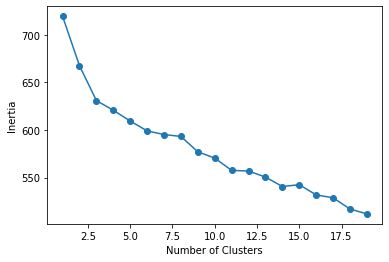

In [107]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, max_iter=200, n_init=10)
    km.fit(doc_word_tfidf)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');